In [19]:
import json                                                                     # Import json converter
import numpy as np                                                              # Import Numpy and represent it with "np"
import pandas as pd                                                             # Import Pandas and represent it with "pd"
import seaborn as sns                                                           # Import Seaborn and represent it with "sns"
import pandas_profiling                                                         # Import Panda profiler
import missingno as msno                                                        # Import Imcomplete data visualizer and represent it eith "msno"
import matplotlib.pyplot as plt                                                 # IMport Pyplot from Matplotlib and represent it with "plt"
from ast import literal_eval                                                    # Import Literal evaluator from AST 
from google.colab import drive                                                  # Import Google Drive file importer  
from sklearn.preprocessing import MinMaxScaler                                  # Import MinMaxScaler split from processing in Sklearn                      
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity           # Import Linear kernel and Cosine similarity from Pairwise in metriccs within Sklearn                                           
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer    # Import Tfidf Vectorizer and Count Vectorizer from text in feature extraction within Sklearn                                                                                                 

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip    # Install updated version of Pandas profiler from github archive

In [3]:
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
credits = pd.read_csv('/content/drive/My Drive/Colab Notebooks/imdb dataset/tmdb_5000_credits.csv')     # Change "Colab Notebooks/imdb dataset/tmdb_5000_credits.csv" to location of file in Google Drive
movies = pd.read_csv('/content/drive/My Drive/Colab Notebooks/imdb dataset/tmdb_5000_movies.csv')       # Change "Colab Notebooks/imdb dataset/tmdb_5000_movies.csv" to location of file in Google Drive

credits.head()                                                                  # Display the first 5 rows of credits file

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
credits.describe()                                                              # Display description of numeric columns in credits file 

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [8]:
movies.head()                                                                   # Display the first 5 rows of movie file

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
movies.describe()                                                               # Display description of numeric columns in movies file 

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [9]:
movies.iloc[25]                                                                 # Display the contents of the row specified

budget                                                          200000000
genres                  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...
homepage                                      http://www.titanicmovie.com
id                                                                    597
keywords                [{"id": 2580, "name": "shipwreck"}, {"id": 298...
original_language                                                      en
original_title                                                    Titanic
overview                84 years later, a 101-year-old woman named Ros...
popularity                                                        100.026
production_companies    [{"name": "Paramount Pictures", "id": 4}, {"na...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   1997-11-18
revenue                                                        1845034188
runtime                               

In [10]:
credits.columns = ['id', 'title', 'cast', 'crew']                               # Header for credit colums are defined   
credits['id'] = credits['id'].astype('int')                                     # Contents of column id in credits are defined as integer 
movies['id'] = movies['id'].astype('int')                                       # Contents of column id in movies are defined as integer
movies= pd.merge(credits, movies, on = 'id')                                    # Contents off credits are merged to movies based on their similar id numbers

<function matplotlib.pyplot.show>

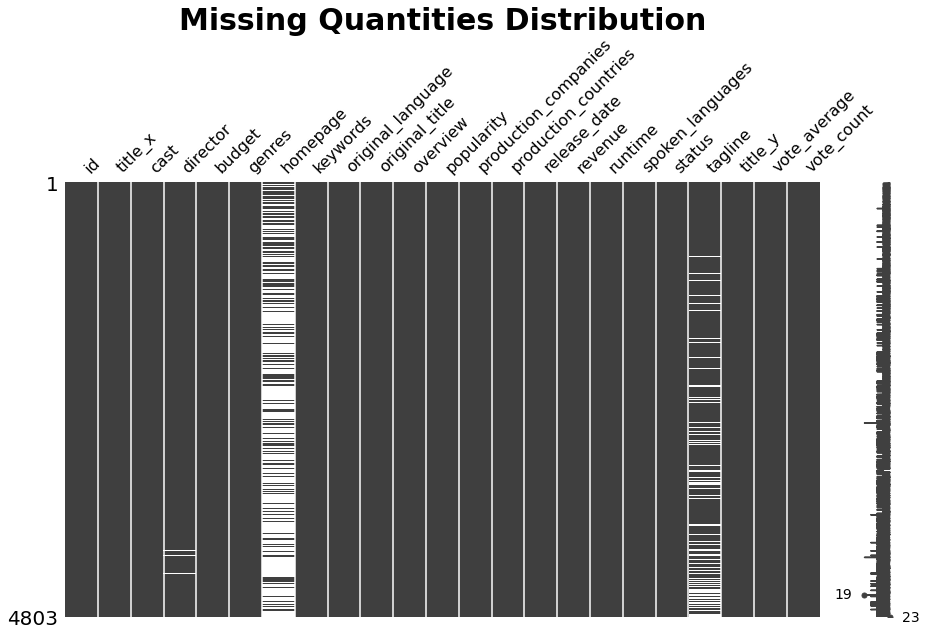

In [20]:
msno.matrix(movies, figsize= (15, 8))                                           # Imcomplete data visualizer 
plt.title('Missing Quantities Distribution', fontsize = 30, fontweight='bold')  # Visualizer title and font size is defined 
plt.show                                                                        # Show plot

In [23]:
movies_report = movies[['original_title', 'director', 'popularity',             # Create a new table "movies report" with items listed to be selected from the table movies for report purpose
                        'runtime', 'revenue', 'vote_count', 'vote_average']]
m = movies_report['vote_average'].quantile(0.5)                                 # Quantille is set on the column "vote average" in other to remove outliers
movies_report = movies_report.copy().loc[movies_report['vote_average'] >= m]    # The table was adjusted and outliers were removed 
profile = pandas_profiling.ProfileReport(movies_report)                         # Pandas data profiler report
profile                                                                         # Display the profile of the data in the movie report table

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
def get_list(x):                                                                # Definition of a new function "get list" which takes column name as argument  
  if isinstance(x, list):                                                       # Checks validity of the statement if the contents of the column is a list, if true
      names = [i['name'] for i in x]                                            # Selects the Each array as "i", select all the value pair with the key "name" within each array
      if len(names) > 3:                                                        # Check if more than three elements exist in the each array
          names = names[:3]                                                     # If yes, selects the first three
      return names                                                              # Return the selected three names. If no, return entire list
  return []                                                                     # If earlier statement is not valid due to missing/malformed data, return empty list 

features = ['keywords', 'genres', 'cast']                                       # An array features is created with a list of columns 
for feature in features:                                                        # For each of the column in the list of columns
  movies[feature] = movies[feature].apply(json.loads)                           # For each of the columns convert it from json format to list formart
  movies[feature] = movies[feature].apply(get_list)                             # For each of the columns apply the get list function to it

movies['crew'] = movies['crew'].apply(json.loads)                               # for the column crew convert it from json format to list formart
def director(x):                                                                # Definition of a new function "director" which takes column name as argument
    for i in x:                                                                 # For every array in each row 
        if i['job'] == 'Director':                                              # Checks validity of the statement if the key "job" has a value pair "director"  
            return i['name']                                                    # Return the value pair with the key "name" for that array
movies['crew'] = movies['crew'].apply(director)                                 # For the column crew apply the director function to it
movies.rename(columns={'crew':'director'},inplace=True)                         # Rename the column crew to director


In [12]:
metadata = movies[['id','original_title','genres',                              # Create a new table "metadata" with items listed to be selected from the table movies
                   'cast','director','keywords', 'vote_count', 'vote_average']]
metadata.head()                                                                 # Display the first 5 rows of the table "metadata"    

,id,original_title,genres,cast,director,keywords,vote_count,vote_average
0,19995,Avatar,"[Action, Adventure, Fantasy]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]",11800,7.2
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]",4500,6.9
2,206647,Spectre,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]",4466,6.3
3,49026,The Dark Knight Rises,"[Action, Crime, Drama]","[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]",9106,7.6
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]",2124,6.1


In [13]:
metadata.shape                                                                  # Display the size of the table "metadata" 

(4803, 8)

In [14]:
m = metadata['vote_count'].quantile(0.5)                                        # Quantille is set on the column "vote count" in other to remove outliers
metadata_copy = metadata.copy().loc[metadata['vote_count'] >= m]                # A new table of the copy of metadata is created with contents excluding the outliers 
metadata_copy.shape                                                             # Display the size of the table "metadata_copy" 

(2407, 8)

In [15]:
metadata_copy = metadata_copy.sort_values('vote_average', ascending=False)      # Sort movies based on vote agerage

metadata_copy[['original_title', 'vote_count', 'vote_average']].head(20)        # Print the top 20 movies

,original_title,vote_count,vote_average
1881,The Shawshank Redemption,8205,8.5
3337,The Godfather,5893,8.4
2294,千と千尋の神隠し,3840,8.3
1818,Schindler's List,4329,8.3
2731,The Godfather: Part II,3338,8.3
3865,Whiplash,4254,8.3
662,Fight Club,9413,8.3
3232,Pulp Fiction,8428,8.3
1990,The Empire Strikes Back,5879,8.2
809,Forrest Gump,7927,8.2


In [17]:
metadata_copy.info()                                                            # Display information about the columns of the table metadeta_copy

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407 entries, 1881 to 1652
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2407 non-null   int64  
 1   original_title  2407 non-null   object 
 2   genres          2407 non-null   object 
 3   cast            2407 non-null   object 
 4   director        2407 non-null   object 
 5   keywords        2407 non-null   object 
 6   vote_count      2407 non-null   int64  
 7   vote_average    2407 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 169.2+ KB


In [24]:
def clean_data(x):                                                              # Definition of a new function "clen data" which takes column name as argument and convert all strings to lower case and strip names of spaces
    if isinstance(x, list):                                                     # Checks validity of the statement if the contents of the column is a list, if true
        return [str.lower(i.replace(" ", "")) for i in x]                       # For all items in the defined column return the lower case of the item sripped of spaces 
    else:                                                                       # If earlier statement not valid
        if isinstance(x, str):                                                  # Checks validity of the statement if the contents of the column is a string hence director
            return str.lower(x.replace(" ", ""))                                # For all items in the defined column return the lower case of the item sripped of spaces 
        else:                                                                   # If earlier statement not valid
            return ''                                                           # Return empty string

In [25]:
features = ['cast', 'keywords', 'director', 'genres']                           # An array features is created with a list of columns 

for feature in features:                                                        # For each of the column in the list of columns
    metadata_copy[feature] = metadata_copy[feature].apply(clean_data)           # For each of the columns apply the clean data function to it

In [33]:
def create_soup(x):                                                             # Definition of a new function "create soup" 
    return (' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' '           # Function takes all listed columns per row and concatenates them together
             + x['director'] + ' ' + ' '.join(x['genres']))    

metadata_copy['soup'] = metadata_copy.apply(create_soup, axis=1)                # Creates a new column "soup" and append the results of soup function per row to it
metadata_copy[['soup']]                                                         # Display the newly created soup row

,soup
1881,prison corruption policebrutality timrobbins m...
3337,italy loveatfirstsight lossoffather marlonbran...
2294,witch parentskidsrelationship magic rumihiirag...
1818,factory concentrationcamp hero liamneeson benk...
2731,italo-american cuba vororte alpacino robertduv...
...,...
309,baby mask viking jamiekennedy alancumming tray...
2122,kalpenn adamcampbell jennifercoolidge jasonfr...
480,basedonnovel post-apocalyptic dystopia johntra...
2194,naturaldisaster violence mortaldanger mattlant...


In [35]:
count = CountVectorizer(stop_words='english')                                   # Introduce stop words from the english dictionary
count_matrix = count.fit_transform(metadata_copy['soup'])                       # Create a matrix and fit the stop words to the soup column earlier created
cosine_sim = cosine_similarity(count_matrix, count_matrix)                      # Generate the cosine similarity matrix for the items in the soup in relatioon to other items in the soup

In [28]:
indices = pd.Series(metadata_copy.index,                                        # Construct a reverse map of indices and movie titles
                    index=metadata_copy['original_title']).drop_duplicates()       

In [29]:
indices[:10]                                                                    # Displays the first ten items generated by from the soup

original_title
The Shawshank Redemption    1881
The Godfather               3337
千と千尋の神隠し                    2294
Schindler's List            1818
The Godfather: Part II      2731
Whiplash                    3865
Fight Club                   662
Pulp Fiction                3232
The Empire Strikes Back     1990
Forrest Gump                 809
dtype: int64

In [30]:
def get_recommendations(title, cosine_sim=cosine_sim):                          # Function that takes in movie title as input and outputs most similar movies
    idx = indices[title]                                                        # Get the index of the movie that matches the title
    sim_scores = list(enumerate(cosine_sim[idx]))                               # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)           # Sort the movies based on the similarity scores   
    sim_scores = sim_scores[1:11]                                               # Get the scores of the 10 most similar movies
    movie_indices = [i[0] for i in sim_scores]                                  # Get the movie indices
    return metadata_copy['original_title'].iloc[movie_indices]                  # Return the top 10 most similar movies

In [ ]:
get_recommendations('千と千尋の神隠し')                                           # Initiating the get reommendation fucntion

210                        Batman & Robin
1359                               Batman
303                              Catwoman
65                        The Dark Knight
3                   The Dark Knight Rises
119                         Batman Begins
2625                  Kiss Kiss Bang Bang
98      The Hobbit: An Unexpected Journey
813                              Superman
14                           Man of Steel
Name: original_title, dtype: object

In [31]:
get_recommendations('Night at the Museum')

1832               Chocolat
49         The Great Gatsby
1081     Revolutionary Road
2661         Romeo + Juliet
809            Forrest Gump
25                  Titanic
2108    Edward Scissorhands
1564    Legends of the Fall
1891              Dear John
961               The Beach
Name: original_title, dtype: object

In [32]:
get_recommendations('Harry Potter and the Half-Blood Prince')

2912                               Star Wars
1490                      Return of the Jedi
2815         Star Trek II: The Wrath of Khan
260                             Ender's Game
193                              After Earth
2085                 Raiders of the Lost Ark
1006      Indiana Jones and the Last Crusade
1697    Indiana Jones and the Temple of Doom
101                       X-Men: First Class
2317     Star Trek III: The Search for Spock
Name: original_title, dtype: object

# CHEERS